In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression

# Hate crime density map

In [ ]:
crime_df = pd.read_csv('/content/drive/MyDrive/Carnegie Mellon University/15-688 Practical Data Science/Cleaned tables/merged.csv')
crime_df.set_index(['State_Abbr','State','Year'], inplace=True)
crime_df = crime_df[['num_crimes','num_asians_per_km2']]
crime_df.head()

num_crimes  num_asians_per_km2
State_Abbr State      Year                                
CA         California 1997         160                  15
                      1996         153                  15
                      1995         142                  15
                      1998         135                  15
                      1999         126                  15

In [ ]:
crime_df['density'] = crime_df['num_crimes']/crime_df['num_asians_per_km2']
crime_df.head()

num_crimes  num_asians_per_km2    density
State_Abbr State      Year                                           
CA         California 1997         160                  15  10.666667
                      1996         153                  15  10.200000
                      1995         142                  15   9.466667
                      1998         135                  15   9.000000
                      1999         126                  15   8.400000

In [ ]:
density_all_df = (
    crime_df[['density']]
    .reset_index()
    .groupby(['State_Abbr','State'])
    .agg({'density':'mean'})
)
density_all_df.head()

,,density
State_Abbr,State,
AK,Alaska,0.310345
AL,Alabama,0.103448
AR,Arkansas,0.793103
AZ,Arizona,4.896552
CA,California,3.944828


In [ ]:
fig = px.choropleth(
    density_all_df,
    locationmode='USA-states',
    scope='usa',
    locations=density_all_df.index.get_level_values(0),
    color=density_all_df.density,
    hover_name=density_all_df.index.get_level_values(1),
)

fig.show()

In [ ]:
density_9101_df = (
    crime_df
    .reset_index()
)
density_9101_df = density_9101_df[density_9101_df['Year'].between(1991,2001)]
density_9101_df = (
    density_9101_df
    .groupby(['State_Abbr','State'])
    .agg({'density':'mean'})
)
density_9101_df.head()

,,density
State_Abbr,State,
AK,Alaska,0.363636
AL,Alabama,0.000000
AR,Arkansas,0.272727
AZ,Arizona,6.636364
CA,California,6.000000


In [ ]:
density_0111_df = (
    crime_df
    .reset_index()
)
density_0111_df = density_0111_df[density_0111_df['Year'].between(2001,2011)]
density_0111_df = (
    density_0111_df
    .groupby(['State_Abbr','State'])
    .agg({'density':'mean'})
)
density_0111_df.head()

,,density
State_Abbr,State,
AK,Alaska,0.272727
AL,Alabama,0.181818
AR,Arkansas,1.727273
AZ,Arizona,4.909091
CA,California,3.503030


In [ ]:
density_1119_df = (
    crime_df
    .reset_index()
)
density_1119_df = density_1119_df[density_1119_df['Year'].between(2011,2019)]
density_1119_df = (
    density_1119_df
    .groupby(['State_Abbr','State'])
    .agg({'density':'mean'})
)
density_1119_df.head()

,,density
State_Abbr,State,
AK,Alaska,0.222222
AL,Alabama,0.222222
AR,Arkansas,0.111111
AZ,Arizona,3.000000
CA,California,2.007407


In [ ]:
fig1 = px.choropleth(
    density_9101_df,
    locationmode='USA-states',
    scope='usa',
    locations=density_9101_df.index.get_level_values(0),
    color=density_9101_df.density,
    hover_name=density_9101_df.index.get_level_values(1),
)

fig1.show()

fig2 = px.choropleth(
    density_0111_df,
    locationmode='USA-states',
    scope='usa',
    locations=density_0111_df.index.get_level_values(0),
    color=density_0111_df.density,
    hover_name=density_0111_df.index.get_level_values(1),
)

fig2.show()

fig3 = px.choropleth(
    density_1119_df,
    locationmode='USA-states',
    scope='usa',
    locations=density_1119_df.index.get_level_values(0),
    color=density_1119_df.density,
    hover_name=density_1119_df.index.get_level_values(1),
)

fig3.show()

# Housing prices vs hate crime

In [ ]:
housing_df = pd.read_csv('/content/drive/MyDrive/Carnegie Mellon University/15-688 Practical Data Science/Cleaned tables/merged.csv')
housing_df = housing_df[['HPI','num_crimes','Year','num_asians_per_km2']]
housing_df = housing_df[housing_df['num_crimes'] != 0]
housing_df['density'] = housing_df['num_crimes']/housing_df['num_asians_per_km2']

housing_df.head()

,HPI,num_crimes,Year,num_asians_per_km2,density
0,422.33,160,1997,15,10.666667
1,411.04,153,1996,15,10.200000
2,411.40,142,1995,15,9.466667
3,456.42,135,1998,15,9.000000
4,487.38,126,1999,15,8.400000


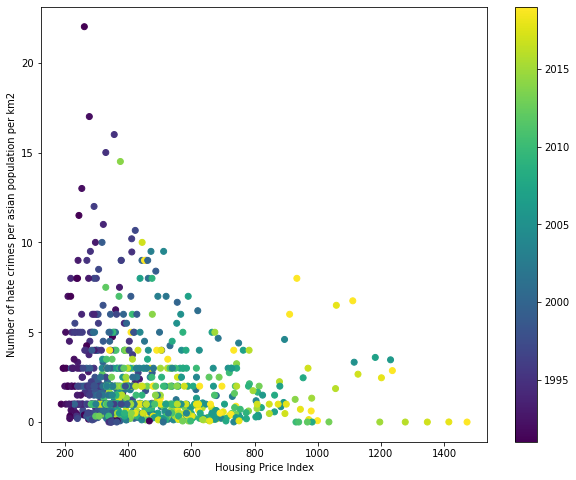

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(
    housing_df['HPI'],
    housing_df['density'],
    c=housing_df['Year'],
)
plt.ylabel('Number of hate crimes per asian population per km2')
plt.xlabel('Housing Price Index')
plt.colorbar()
plt.show()